In [1]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

In [51]:
DATA=ascii.read('iris.data',names=['Sepal Len.','Sepal Width','Petal Len.','Petal Width','Class'])

In [56]:
setosaTrain=DATA[:10]
versTrain=DATA[50:60]
virgTrain=DATA[100:110]

setosaVal=DATA[10:30]
versVal=DATA[60:80]
virgVal=DATA[110:130]

setosaTest=DATA[30:50]
versTest=DATA[80:100]
virgTest=DATA[130:]

virgTrain.show_in_notebook()

idx,Sepal Len.,Sepal Width,Petal Len.,Petal Width,Class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.1,3.0,5.9,2.1,Iris-virginica
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica
5,7.6,3.0,6.6,2.1,Iris-virginica
6,4.9,2.5,4.5,1.7,Iris-virginica
7,7.3,2.9,6.3,1.8,Iris-virginica
8,6.7,2.5,5.8,1.8,Iris-virginica
9,7.2,3.6,6.1,2.5,Iris-virginica


In [168]:
def SampleMean(Data,keys):
    out=np.zeros(len(keys))
    for i in range(len(keys)):
        out[i]=np.mean(Data[keys[i]])
    return out
def Conv2Arr(X):
    X=X.as_array()
    return X.view(float).reshape(X.shape+(-1,))

In [61]:
colors=['red','lime','blue']
names=['Setosa','Versicolor','Virginica']
Train=[setosaTrain,versTrain,virgTrain]
Val=[setosaVal,versVal,virgVal]
Test=[setosaTest,versTest,virgTest]

Text(0, 0.5, 'Petal Width [cm]')

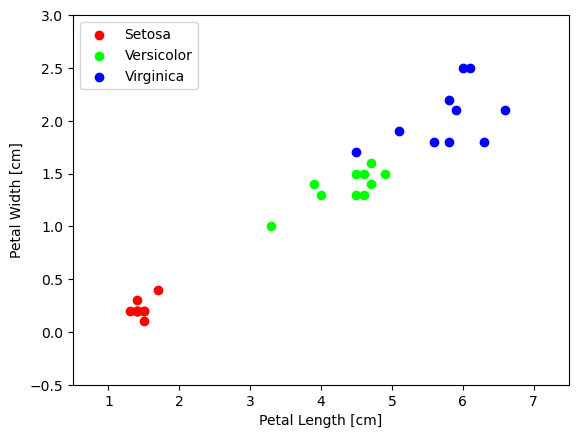

In [64]:
for i in [0,1,2]:
    plt.scatter('Petal Len.','Petal Width',data=Train[i],color=colors[i],label=names[i])
plt.xlim([0.5,7.5])
plt.ylim([-0.5,3.0])
plt.legend()
plt.xlabel('Petal Length [cm]')
plt.ylabel('Petal Width [cm]')

In [200]:
X=np.array([Conv2Arr(setosaTrain['Petal Len.','Petal Width'])[1]])

In [203]:
np.dot(X.T,X)


array([[1.96, 0.28],
       [0.28, 0.04]])

In [202]:
X2

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [196]:
data.view(np.float).reshape(data.shape + (-1,))

NameError: name 'data' is not defined